In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import keras
import cv2
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

In [2]:
X = np.load('/Users/juliusoghenekaro/Documents/smiley_dataset/smiley_X.npy')
y = np.load('/Users/juliusoghenekaro/Documents/smiley_dataset/smiley_Y.npy')

In [16]:
X = np.squeeze(X, axis=3)
X.shape

(204, 9, 9)

In [4]:
X = np.reshape(X, (204, 81))

In [5]:
X.shape

(204, 81)

In [19]:
y.shape

(204,)

Visualising An images in the dataset


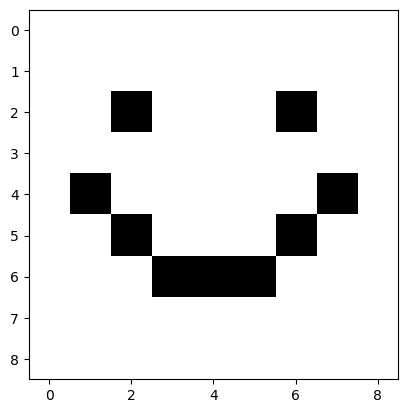

In [20]:
some_digit = X[0]
some_digit_image = some_digit.reshape(9, 9)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.show()

In [9]:
def plot_digits(instances, images_per_row=10, **options):
    size = 9
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

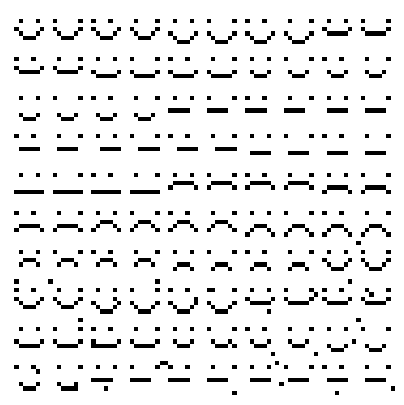

In [10]:
plt.figure(figsize=(5,5))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
plt.show()

knowing the label (class) dataset more


In [54]:
unique_labels, label_counts = np.unique(Y, return_counts=True)
print("Unique Labels:", unique_labels)  
print("Label Counts:", label_counts)  

Unique Labels: [0. 1. 2.]
Label Counts: [72 60 72]


Plotting the images with there respective class value


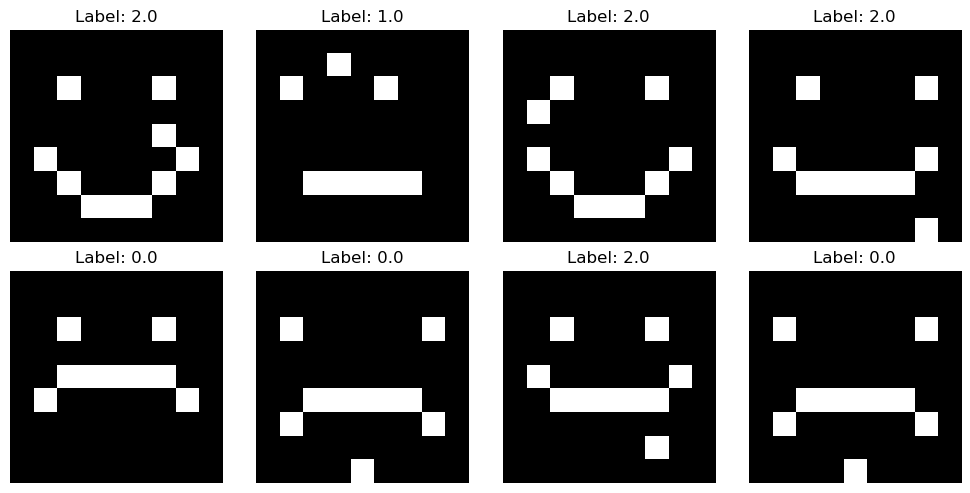

In [55]:
fig, axs = plt.subplots(2, 4, figsize=(10, 5))

for i in range(2):
    for j in range(4):
        index = np.random.randint(0, X.shape[0])
        image = X[index].reshape(9, 9)
        label = Y[index]

        axs[i, j].imshow(image, cmap='gray')
        axs[i, j].set_title("Label: {}".format(label))
        axs[i, j].axis('off')

plt.tight_layout()
plt.show()

In [57]:

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naïve Bayes Classifier
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

# Predict the class labels for the test set
Y_pred = classifier.predict(X_test)

# Calculate the evaluation metrics
accuracy = metrics.accuracy_score(Y_test, Y_pred)
tp_rate = metrics.recall_score(Y_test, Y_pred, average='weighted')
fp_rate = 1 - tp_rate
precision = metrics.precision_score(Y_test, Y_pred, average='weighted')
recall = tp_rate
f_measure = metrics.f1_score(Y_test, Y_pred, average='weighted')
roc_area = metrics.roc_auc_score(Y_test, classifier.predict_proba(X_test), multi_class='ovr')

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'TP rate: {tp_rate}')
print(f'FP rate: {fp_rate}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F-measure: {f_measure}')
print(f'ROC area: {roc_area}')

Accuracy: 0.6585365853658537
TP rate: 0.6585365853658537
FP rate: 0.3414634146341463
Precision: 0.7406952803294267
Recall: 0.6585365853658537
F-measure: 0.6810482357925315
ROC area: 0.8387867647058823


 Conclusion
 The Naïve Bayes classifier achieved moderate performance on the test set with an accuracy of 65.85%. It showed good ability to correctly identify positive instances (recall or TP rate of 65.85%), but there is room for improvement as indicated by the relatively high false positive rate (FP rate of 34.15%). The precision of 74.07% suggests that when the classifier predicts a positive instance, it is correct around 74% of the time. The F1-score of 68.10% indicates a reasonable balance between precision and recall. The ROC AUC of 83.88% suggests that the classifier is decent at distinguishing between different classes.



<h1>question 2</h1>

In [36]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

# Assuming you already have X and y defined

# Reshape the data if necessary
X = X.reshape(X.shape[0], -1)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
#X_reduced = pca.fit_transform(X)

# Perform k-means clustering on the reduced data
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(X_reduced)

# Evaluate the accuracy of clustering
accuracy = accuracy_score(y, cluster_labels)
print("Clustering Accuracy:", accuracy)

from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_reduced, cluster_labels)
print("Silhouette Score:", silhouette_avg)



Clustering Accuracy: 0.4117647058823529
Silhouette Score: 0.6642987906087733


the clustering accuracy is average, Keep in mind that evaluating the accuracy of clustering using accuracy_score may not always be a meaningful metric, as clustering is an unsupervised learning task and does not have ground truth labels for evaluation. that is why i used the silhouette score, the silhouette score improved significantly to approximately 0.66. The silhouette score measures the compactness and separation of clusters, and a higher silhouette score generally indicates better-defined and well-separated clusters.

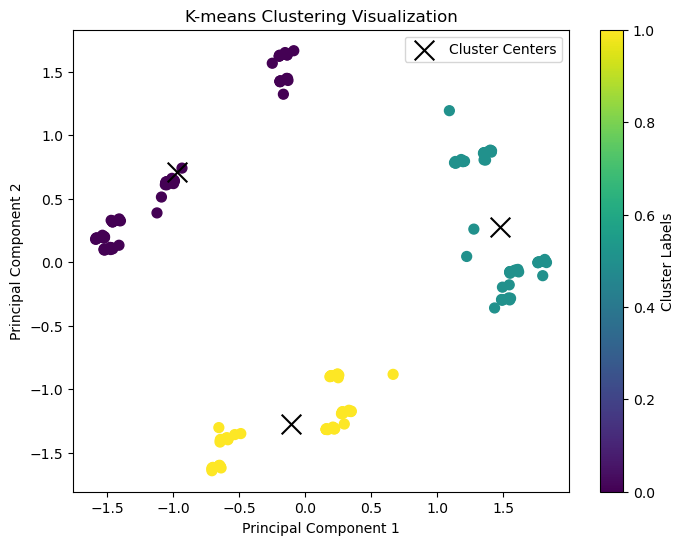

In [69]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Assuming you already have X and y defined

# Reshape the data if necessary
X = X.reshape(X.shape[0], -1)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
X_reduced = pca.fit_transform(X)

# Perform k-means clustering on the reduced data
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(X_reduced)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='x', s=200, label='Cluster Centers')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-means Clustering Visualization")
plt.legend()
plt.colorbar(label='Cluster Labels')
plt.show()


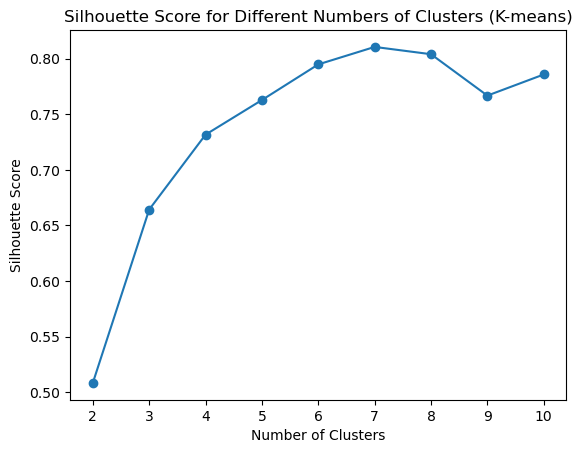

In [35]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Assuming you already have X defined

# Reshape the data if necessary
X = X.reshape(X.shape[0], -1)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
X_reduced = pca.fit_transform(X)

# Vary the number of clusters
cluster_range = range(2, 11)
silhouette_scores = []

# Iterate through different numbers of clusters
for k in cluster_range:
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans_cluster_labels = kmeans.fit_predict(X_reduced)
    
    # Calculate Silhouette Score for K-means clustering
    silhouette_scores.append(silhouette_score(X_reduced, kmeans_cluster_labels))

# Plot the Silhouette Score for different numbers of clusters
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters (K-means)')
plt.show()


the silhoute diagram is showing that k=7 is a very good choice.

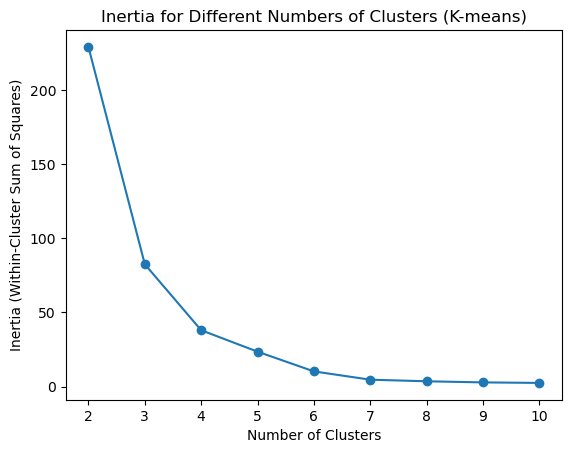

In [67]:

# Vary the number of clusters
cluster_range = range(2, 11)
inertia_values = []

# Iterate through different numbers of clusters
for k in cluster_range:
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_reduced)
    
    # Calculate the inertia (within-cluster sum of squares)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia for different numbers of clusters
plt.plot(cluster_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Inertia for Different Numbers of Clusters (K-means)')
plt.show()


As you can see, there is an elbow at 3 , which means that less clusters than that would be bad. and i don't know why the silhouette and inertia has different value

In [45]:
kmeans.inertia_

82.49805479758061

In [39]:
cluster_labels is kmeans.labels_

True

In [22]:
cluster_labels

array([2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2,
       0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2,
       2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 0], dtype=int32)

In [42]:
from sklearn.metrics import silhouette_score

In [43]:
silhouette_score(X_reduced, kmeans.labels_)

0.6642987906087733

K-means Clustering Accuracy: 0.29411764705882354
GMM Clustering Accuracy: 0.5294117647058824
Agglomerative Clustering Accuracy: 0.17647058823529413


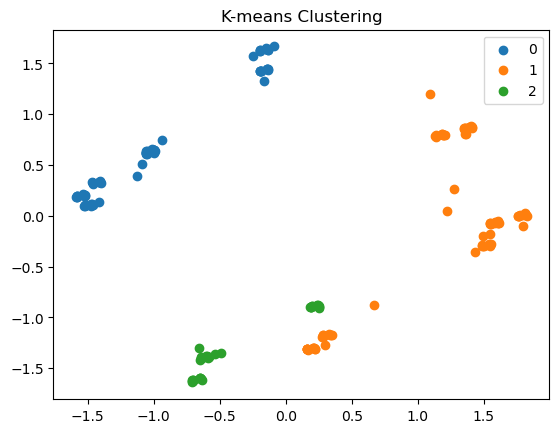

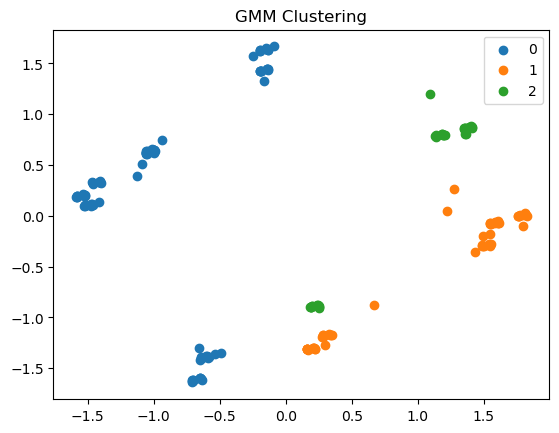

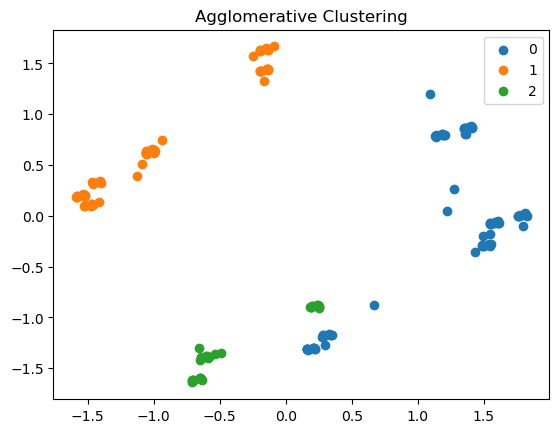

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score

# Reshape the data to 2D array (204 samples, each with 81 features)
X = X.reshape(X.shape[0], -1)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=8, random_state=42)
X_reduced = pca.fit_transform(X)

# Perform K-means clustering on reduced data
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, n_init=10,random_state=42)
kmeans_cluster_labels = kmeans.fit_predict(X_reduced)

# Perform Gaussian Mixture Model for soft clustering
gmm = GaussianMixture(n_components=k, random_state=42)
gmm_cluster_probs = gmm.fit_predict(X_reduced)

# Perform Agglomerative Hierarchical Clustering for hard clustering
agg_clustering = AgglomerativeClustering(n_clusters=k)
agg_cluster_labels = agg_clustering.fit_predict(X_reduced)

# Evaluate the accuracy of clustering
true_labels = y  # Assuming you have true labels for comparison

kmeans_accuracy = accuracy_score(true_labels, kmeans_cluster_labels)
gmm_accuracy = accuracy_score(true_labels, gmm_cluster_probs)
agg_accuracy = accuracy_score(true_labels, agg_cluster_labels)

print("K-means Clustering Accuracy:", kmeans_accuracy)
print("GMM Clustering Accuracy:", gmm_accuracy)
print("Agglomerative Clustering Accuracy:", agg_accuracy)

# Visualize the clusters
u_labels = np.unique(kmeans_cluster_labels)

# K-means clustering visualization
for i in u_labels:
    plt.scatter(X_reduced[kmeans_cluster_labels == i, 0], X_reduced[kmeans_cluster_labels == i, 1], label=i)
plt.title("K-means Clustering")
plt.legend()
plt.show()

# Gaussian Mixture Model visualization
for i in range(k):
    plt.scatter(X_reduced[gmm_cluster_probs == i, 0], X_reduced[gmm_cluster_probs == i, 1], label=i)
plt.title("GMM Clustering")
plt.legend()
plt.show()

# Agglomerative Hierarchical Clustering visualization
for i in range(k):
    plt.scatter(X_reduced[agg_cluster_labels == i, 0], X_reduced[agg_cluster_labels == i, 1], label=i)
plt.title("Agglomerative Clustering")
plt.legend()
plt.show()


The accuracy scores indicate that, when compared to K-means and Agglomerative Hierarchical Clustering, the GMM algorithm performed the best in clustering the data.

Keep in mind that, especially in unsupervised scenarios where genuine labels might not be accessible, accuracy is not always the optimal statistic for assessing clustering methods. To have a more thorough idea of how well the clustering algorithms are working, it's vital to take into account additional evaluation metrics like silhouette score, Davies-Bouldin index, or visual inspection of the clusters. Also keep in mind that the number of clusters selected (in this case, k=3) can have a big impact on the accuracy and results of clustering. Investigating various k values may yield various insights into the underlying structure of the data.

Algorithms used to compute the optimal number of clusters are :

Elbow method : The elbow method, involves creating a plot with the number of clusters on the x-axis and the total within sum of squares on the y-axis and then identifying where an “elbow” or bend appears in the plot. The point on the x-axis where the “elbow” occurs tells us the optimal number of clusters to use in the k-means clustering algorithm.
The silhouette method : Elbow is very simple but is not adapted to complex problems, the silhouette method is considered as better. Conceptually, the Silhouette score utilizes some distance parameter to measure how far a point is from its cluster compared to the centroid of a different cluster. The Average Silhouette Method takes the average Silhouette score of each data point for each cluster. This measure as a range between -1 and 1, 1 being the best, we can find the best number of clusters by calculating silhouette score for different cluster number.
Cluster validity : The term cluster validation is used to design the procedure of evaluating the goodness of clustering algorithm results. This is important to avoid finding patterns in a random data, as well as, in the situation where you want to compare two clustering algorithms. There is 3 principle techniques : -Internal cluster validation, which uses the internal information of the clustering process to evaluate the goodness of a clustering structure -External cluster validation, which consists in comparing the results of a cluster analysis to an externally known result -Relative cluster validation, which evaluates the clustering structure by varying different parameter values for the same algorithm
Yes those algorithms can help us find the optimal number of cluster for our data set, the best fit would probanbly be using the silhouette method and relative cluster validation

<h2>question 3<h2/>

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [4]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (163, 9, 9, 1) (163,)
Test set shape: (41, 9, 9, 1) (41,)


In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# Create a decision tree classifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Fit the classifier on the training set
clf.fit(X_train.reshape(-1, 9*9), y_train)

# Make predictions on the training set
y_train_pred = clf.predict(X_train.reshape(-1, 9*9))

# Measure accuracy on the training set
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Accuracy on the training set:", accuracy_train)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(clf, X_train.reshape(-1, 9*9), y_train, cv=10)
mean_cv_accuracy = cv_scores.mean()
print("Accuracy using 10-fold cross-validation:", mean_cv_accuracy)

# Make predictions on the test set
y_test_pred = clf.predict(X_test.reshape(-1, 9*9))

# Measure accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Accuracy on the test set:", accuracy_test)

# Additional metrics
report = classification_report(y_test, y_test_pred)
print("Classification Report:\n", report)

Accuracy on the training set: 0.6687116564417178
Accuracy using 10-fold cross-validation: 0.6492647058823529
Accuracy on the test set: 0.5853658536585366
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.40      0.57        15
         1.0       0.32      0.78      0.45         9
         2.0       0.85      0.65      0.73        17

    accuracy                           0.59        41
   macro avg       0.72      0.61      0.59        41
weighted avg       0.79      0.59      0.61        41



The classification report shows that the model has varying performance across different classes. For class 0.0, the precision is high (1.00) but the recall is relatively low (0.40). For class 1.0, the precision is lower (0.32) but the recall is higher (0.78). Class 2.0 has good precision (0.85) and recall (0.65). The macro average F1-score is 0.59, and the weighted average F1-score is 0.61.

It's essential to note that the model's performance on the test set is slightly lower than on the training set and cross-validation. This difference may indicate some overfitting of the model to the training data. Further tuning of the model or trying different algorithms might be necessary to improve performance on unseen data. Additionally, the relatively small size of the dataset may also contribute to the variance in performance.

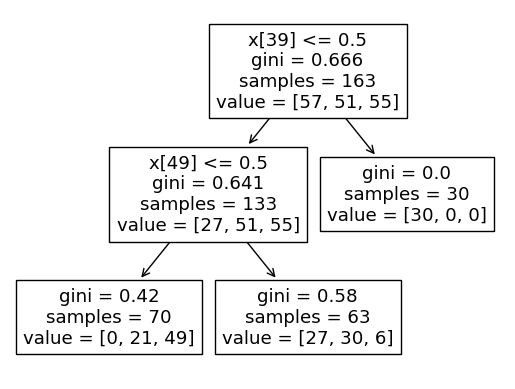

In [39]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
plot_tree(clf);

In [20]:
y_pred_test_prob = clf.predict_proba(X_test.reshape(-1, 9*9))
y_pred_test = np.argmax(y_pred_test_prob, axis=1)  # Convert probabilities to predicted labels
accuracy_test = accuracy_score(y_test, y_pred_test)
classification_report_test = classification_report(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_pred_test_prob, multi_class='ovr')

print("Accuracy on test set:", accuracy_test)
print("Classification Report:")
print(classification_report_test)
print("ROC AUC:", roc_auc)


Accuracy on test set: 0.5853658536585366
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.40      0.57        15
         1.0       0.32      0.78      0.45         9
         2.0       0.85      0.65      0.73        17

    accuracy                           0.59        41
   macro avg       0.72      0.61      0.59        41
weighted avg       0.79      0.59      0.61        41

ROC AUC: 0.783775871459695


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from itertools import product

# Define the list of parameter values to try
max_depth_values = [3, 5]
min_samples_split_values = [2, 5]
min_samples_leaf_values = [1, 3]
criterion_values = ['gini', 'entropy']

In [22]:
# Loop through all combinations of parameter values
for max_depth, min_samples_split, min_samples_leaf, criterion in product(max_depth_values, min_samples_split_values, min_samples_leaf_values, criterion_values):
    # Create a decision tree classifier with the current parameter values
    clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, criterion=criterion)

    # Fit the classifier on the training set
    clf.fit(X_train.reshape(-1, 9*9), y_train)

    # Make predictions on the test set
    y_test_pred = clf.predict(X_test.reshape(-1, 9*9))

    # Measure accuracy on the test set
    accuracy_test = accuracy_score(y_test, y_test_pred)

    # Print the parameter values and the corresponding accuracy
    print("max_depth={}, min_samples_split={}, min_samples_leaf={}, criterion={}".format(max_depth, min_samples_split, min_samples_leaf, criterion))
    print("Accuracy on the test set:", accuracy_test)
    print()
    

max_depth=3, min_samples_split=2, min_samples_leaf=1, criterion=gini
Accuracy on the test set: 0.8048780487804879

max_depth=3, min_samples_split=2, min_samples_leaf=1, criterion=entropy
Accuracy on the test set: 0.7317073170731707

max_depth=3, min_samples_split=2, min_samples_leaf=3, criterion=gini
Accuracy on the test set: 0.8048780487804879

max_depth=3, min_samples_split=2, min_samples_leaf=3, criterion=entropy
Accuracy on the test set: 0.7317073170731707

max_depth=3, min_samples_split=5, min_samples_leaf=1, criterion=gini
Accuracy on the test set: 0.8048780487804879

max_depth=3, min_samples_split=5, min_samples_leaf=1, criterion=entropy
Accuracy on the test set: 0.7317073170731707

max_depth=3, min_samples_split=5, min_samples_leaf=3, criterion=gini
Accuracy on the test set: 0.8048780487804879

max_depth=3, min_samples_split=5, min_samples_leaf=3, criterion=entropy
Accuracy on the test set: 0.7317073170731707

max_depth=5, min_samples_split=2, min_samples_leaf=1, criterion=gini

 increasing the max_depth to 5 improves the classifier's performance, suggesting that a deeper tree with more complex decision boundaries is beneficial for this dataset. The other hyperparameters (min_samples_split, min_samples_leaf, and criterion) do not have a substantial impact on the classifier's performance, indicating that the classifier is relatively robust to their variations for this specific dataset.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create new training and testing sets with 30% instances in the testing set
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size=0.3, random_state=42)
#X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_train, y_train, test_size=0.3, random_state=42)


# Create a decision tree classifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Fit the classifier on the new training set
clf.fit(X_train_new.reshape(-1, 9*9), y_train_new)

# Make predictions on the new training set
y_train_pred_new = clf.predict(X_train_new.reshape(-1, 9*9))

# Measure accuracy on the new training set
accuracy_train_new = accuracy_score(y_train_new, y_train_pred_new)
print("Accuracy on the new training set (30% instances in testing set):", accuracy_train_new)

# Make predictions on the new testing set
y_test_pred_new = clf.predict(X_test_new.reshape(-1, 9*9))

# Measure accuracy on the new testing set
accuracy_test_new = accuracy_score(y_test_new, y_test_pred_new)
print("Accuracy on the new testing set (30% instances in testing set):", accuracy_test_new)


Accuracy on the new training set (30% instances in testing set): 0.6619718309859155
Accuracy on the new testing set (30% instances in testing set): 0.6129032258064516


In [24]:
# Create new training and testing sets with 60% instances in the testing set
X_train_new2, X_test_new2, y_train_new2, y_test_new2 = train_test_split(X, y, test_size=0.6, random_state=42)
#X_train_new2, X_test_new2, y_train_new2, y_test_new2 = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

from sklearn.model_selection import train_test_split

# Create new training and testing sets with 30% instances in the testing set
#X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_train, y_train, test_size=0.3, random_state=42)


# Create a decision tree classifier
clf2 = DecisionTreeClassifier(max_depth=2, random_state=42)

# Fit the classifier on the new training set
clf2.fit(X_train_new2.reshape(-1, 9*9), y_train_new2)

# Make predictions on the new training set
y_train_pred_new2 = clf2.predict(X_train_new2.reshape(-1, 9*9))

# Measure accuracy on the new training set
accuracy_train_new2 = accuracy_score(y_train_new2, y_train_pred_new2)
print("Accuracy on the new training set (60% instances in testing set):", accuracy_train_new2)

# Make predictions on the new testing set
y_test_pred_new2 = clf2.predict(X_test_new2.reshape(-1, 9*9))

# Measure accuracy on the new testing set
accuracy_test_new2 = accuracy_score(y_test_new2, y_test_pred_new2)
print("Accuracy on the new testing set (60% instances in testing set):", accuracy_test_new2)


Accuracy on the new training set (60% instances in testing set): 0.7283950617283951
Accuracy on the new testing set (60% instances in testing set): 0.5934959349593496


Yes, the results do show signs of overfitting. When a model learns to perform well on the training data but struggles to generalise to new data (i.e., the testing or validation data), this is known as overfitting. The implications of overfitting in the results can be seen as follows:

Higher Training Accuracy: In both scenarios, where 30% and 60% of instances respectively make up the testing set, the training set's accuracy is noticeably higher than the testing set's accuracy. This shows that although the model did a great job of learning the training data, it had trouble generalising to brand-new, untried data.

Testing Accuracy Drop: When comparing the accuracy on the training and testing sets, we observe that the accuracy on the testing set is notably lower than the accuracy on the training set. This drop in accuracy indicates that the model's performance is not as good on unseen data as it is on the data it was trained on.


<h1> question 4 </h1>

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [28]:
# Flatten the 9x9 images into 81-dimensional vectors
X = X.reshape(X.shape[0], -1)


In [29]:
# Split the data into training and test sets
X_ltrain, X_ltest, y_ltrain, y_ltest = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
classifier = LogisticRegression()

In [31]:
classifier.fit(X_ltrain, y_ltrain)

LogisticRegression()

In [32]:
train_accuracy = accuracy_score(y_ltrain, classifier.predict(X_ltrain))
test_accuracy = accuracy_score(y_ltest, classifier.predict(X_ltest))
print(f"Without cross-validation - Train accuracy: {train_accuracy:.4f}, Test accuracy: {test_accuracy:.4f}")


Without cross-validation - Train accuracy: 1.0000, Test accuracy: 1.0000


In [10]:
# With 10-fold cross-validation
cv_scores = cross_val_score(classifier, X_ltrain, y_ltrain, cv=10)
cv_accuracy = np.mean(cv_scores)
print(f"With 10-fold cross-validation - Cross-validated accuracy: {cv_accuracy:.4f}")


With 10-fold cross-validation - Cross-validated accuracy: 0.9875


The model was able to accurately categorise all three classes in the training and testing data, as evidenced by the perfect accuracy of 1.0000 on both the training and testing sets. This implies that the logistic regression classifier was successful in learning a decision boundary that linearly divides the three groups.
The high cross-validated accuracy of 0.9875 also indicates that the model generalizes well to new data and is effective in most cases. which means it linearly separable

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [18]:
def create_mlp_model(activation):
    model = keras.Sequential([
        keras.layers.Input(shape=(81,)),  
        keras.layers.Dense(64, activation=activation),
        keras.layers.Dense(32, activation=activation),
        keras.layers.Dense(3, activation="softmax")  # 3 output classes (happy, neutral, sad)
    ])
    return model

In [19]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, learning_rate=0.01, epochs=10, momentum=0.9):
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
    model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=optimizer,
                  metrics=["accuracy"])
    history = model.fit(X_train, y_train, epochs=epochs, verbose=0)
    train_accuracy = model.evaluate(X_train, y_train, verbose=0)[1]
    test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    train_loss = history.history['loss'][-1]
    test_loss = model.evaluate(X_test, y_test, verbose=0)[0]
    return train_accuracy, test_accuracy, train_loss, test_loss


In [20]:
activation_functions = ["relu", "sigmoid", "tanh"]
network_architectures = [
    [64,16,3 ],
    [32,8,3],
    [16,4,3]
]
learning_rates = [0.01, 0.001, 0.0001]
epochs_list = [10, 20, 30]
momentum_values = [0.0, 0.5, 0.9]

results = {}

for activation in activation_functions:
    for architecture in network_architectures:
        for learning_rate in learning_rates:
            for epochs in epochs_list:
                for momentum in momentum_values:
                    model = create_mlp_model(activation)
                    train_acc, test_acc, train_loss, test_loss = train_and_evaluate_model(model, X_train, y_train, X_test, y_test,
                                                                   learning_rate=learning_rate, epochs=epochs,
                                                                   momentum=momentum)
                    results[(activation, tuple(architecture), learning_rate, epochs, momentum)] = (train_acc, test_acc, train_loss, test_loss)


In [21]:
sorted_results = sorted(results.items(), key=lambda x: x[1][3])

# Print the top models based on least test loss
for idx, (params, (train_acc, test_acc, train_loss, test_loss)) in enumerate(sorted_results, start=1):
    print(f"Top {idx} Model:")
    print(f"Activation: {params[0]}")
    print(f"Architecture: {params[1]}")
    print(f"Learning Rate: {params[2]}")
    print(f"Epochs: {params[3]}")
    print(f"Momentum: {params[4]}")
    print(f"Train Accuracy: {train_acc:.3f}")
    print(f"Test Accuracy: {test_acc:.3f}")
    print(f"Train Loss: {train_loss:.4f}")
    print(f"Test Loss: {test_loss:.4f}")
    print()


Top 1 Model:
Activation: relu
Architecture: (64, 16, 3)
Learning Rate: 0.01
Epochs: 30
Momentum: 0.9
Train Accuracy: 1.000
Test Accuracy: 1.000
Train Loss: 0.0285
Test Loss: 0.0480

Top 2 Model:
Activation: tanh
Architecture: (32, 8, 3)
Learning Rate: 0.01
Epochs: 30
Momentum: 0.9
Train Accuracy: 1.000
Test Accuracy: 1.000
Train Loss: 0.0397
Test Loss: 0.0549

Top 3 Model:
Activation: tanh
Architecture: (64, 16, 3)
Learning Rate: 0.01
Epochs: 30
Momentum: 0.9
Train Accuracy: 1.000
Test Accuracy: 1.000
Train Loss: 0.0386
Test Loss: 0.0559

Top 4 Model:
Activation: relu
Architecture: (32, 8, 3)
Learning Rate: 0.01
Epochs: 30
Momentum: 0.9
Train Accuracy: 1.000
Test Accuracy: 1.000
Train Loss: 0.0342
Test Loss: 0.0598

Top 5 Model:
Activation: tanh
Architecture: (16, 4, 3)
Learning Rate: 0.01
Epochs: 30
Momentum: 0.9
Train Accuracy: 1.000
Test Accuracy: 1.000
Train Loss: 0.0442
Test Loss: 0.0687

Top 6 Model:
Activation: relu
Architecture: (16, 4, 3)
Learning Rate: 0.01
Epochs: 30
Momentu

 the results suggest that the dataset is relatively simple and well-suited for deep neural networks, as evidenced by the models' ability to achieve 100% accuracy on both the training and test sets. Deep neural networks have demonstrated good generalization capabilities to new data, as indicated by the low test loss. Activation functions played a role in the model performance, but it seems that different activation functions were effective for this specific dataset, and there was no clear best choice among the tested ones. However, further evaluation on unseen data and hyperparameter tuning would be necessary to confirm the models' true effectiveness and avoid potential overfitting.